# Handling Outliers and what is the impact of outliers in ML

Ans: 
    For handling outliwe,first of all we should know that we need to remove the outlier or we need to increase 
    the weight of outlier(bcoz some outliers are more important)
    
    As we have data of two type- one is Gausssian and 2nd one is Non-Gaussian so we have tech for both
    1) For Gaussian column- we use 3*std deviation technique and calcualte the lower bonudaries and upper boundaries with 
    below formula-
    lower_boundary= df.col_name.mean() - 3* df.col_name.std()
    upper_boundary= df.col_name.mean() + 3* df.col_name.std()
    
    2) Non- Gaussian column- Now we have to work with IQR(Inter Quantile Range)
            First we found our the IQR(diff of 75th percentile - 25th percentile)
            IQR= df.col_name.percentile(.75)- df.col_name.percentile(.25)
            
            Now calculate lower_bridge and upper_bridge(it can be 3 or 1.5 as perrequirements)
            lower_bridge= df['col_name'].quantile(.25)-(IQR * 3)
            upper_bridge= df['col_name'].quantile(.75)+(IQR * 3)
    

In [1]:
import pandas as pd
import numpy as np

During managing outliers we have to take care of many things.

Exp-1 Like yesterday in 5_jan python file we have solved a problem of credit card fraud detection so there is definitely less no of
user are which are fraud so don't think that they are your outlier.

Exp2- Suppose you have a medical data where on every 500 patience one pateince have cancer so normally this also look like a
outlier but it's not. 


**Should Outliers be remove?**:
It's depend on dataset, or what problem we are solving, even sometime(like credit card fraud detection) we give extra important to outlier

Exp- For titanic Dataset should we remove the outlier or not?
So we should remove it.

Exp- For credit Card detection :
No, we can't remove it.

Exp- Sales prediction system :
Keeps 



Which Machine Learning algo are sensitive to outliers? 

1) Naive Bayes Classifier----------------------------  Not sensitive to outlier
2) SVM-----------------------------------------------  Not   
3) Linear Regression --------------------------------  Yes, it's  sensitive
4) Logistic Regression-------------------------------  Yes
5) Decision tree classifier or regressor ------------  Not
6) Ensemble(RF, XGBoost, GB) ------------------------  Not 
7) KNN ----------------------------------------------  Not
8) Kmeans -------------------------------------------  Yes
9) Hierarchical -------------------------------------  Yes
10) PCA ---------------------------------------------  Yes
11) Neural Network-----------------------------------  Yes 
    
    

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

177

In [5]:
import seaborn as sns

c:\users\sairam\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

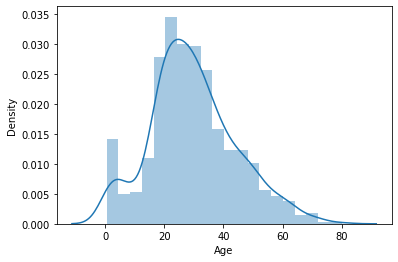

In [8]:
sns.distplot(df['Age'].dropna())

# So we can see from below graph that it's normally/gaussian distributed

c:\users\sairam\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

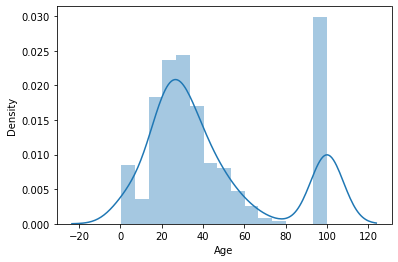

In [10]:
# Let's try to make outlier

sns.distplot(df['Age'].fillna(100))

# So now it become non gaussian dataset(we do this for practice purpose only)


<AxesSubplot:>

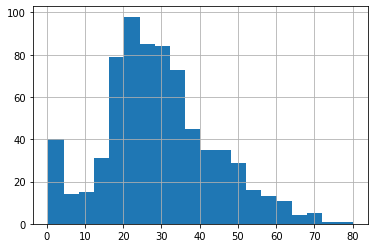

In [11]:
# Let try for hist plot

df.Age.hist(bins=20)

Text(0, 0.5, 'No of passanger')

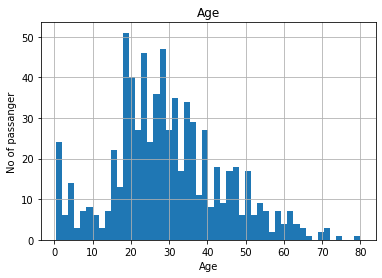

In [13]:
figure= df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passanger')


# Gaussian Distribued

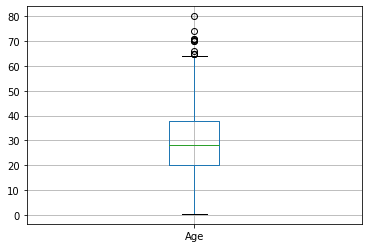

In [15]:
# To see ouliers we use boxplot

figure= df.boxplot('Age')

# So above dot are outliers

In [17]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Below is technique for Gaussian Distribution----------- We use 3- std() technique

In [18]:
# Assuming Age follows the Gaussian Distribution
# we will calculate boundaries which will differentiate the data

#3rd std to the right
upper_boundary= df['Age'].mean()+ 3*df['Age'].std()

#3rdstd to the left
lower_boundary= df['Age'].mean()- 3*df['Age'].std()



In [20]:
# So here we have upper boundary as 73(max value was 80 so 73 to 80 values are outlier)

# For lower- -13, as age can't be negative so will consider this as 0

print(upper_boundary, lower_boundary, df.Age.mean())

# This much is only require for Gaussian Distribution, we need to apply this tech always as it's very effective


73.27860964406094 -13.880374349943303 29.69911764705882


In [21]:
# The below is usefull only in case of non-gaussian, we are just checking for age column(not required as it it gaussian)

# Let's compute the InterQuantile Range to calculate the boundaries---- duff b/w the 25th percentile and 75 percentile

IQR =df.Age.quantile(.75)- df.Age.quantile(.25)
IQR


17.875

In [22]:
# Now we have to calcualte the lower and upper bridge


lower_bridge= df['Age'].quantile(.25)-(IQR * 1.5)

upper_bridge= df['Age'].quantile(.75)+(IQR * 1.5)

print(lower_bridge, upper_bridge)


-6.6875 64.8125


In [23]:
# Suppose you want's to calculate the Extreme boundary

lower_bridge= df['Age'].quantile(.25)-(IQR * 3)

upper_bridge= df['Age'].quantile(.75)+(IQR * 3)

print(lower_bridge, upper_bridge)

-33.5 91.625


In [ ]:
# Let's check fornon-gaussian feature



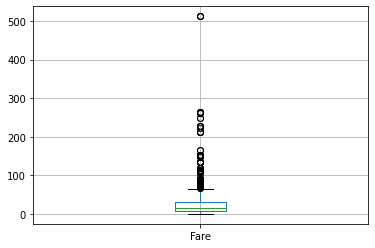

In [24]:
# To see ouliers we use boxplot

figure= df.boxplot('Fare')

# Multiple outlier

c:\users\sairam\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

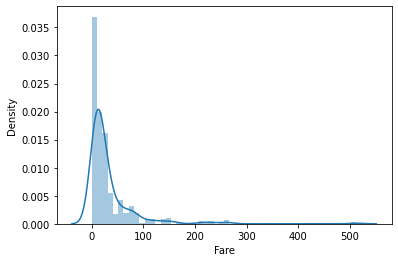

In [25]:
sns.distplot(df.Fare)

# Rightly skewed

Text(0, 0.5, 'No of passanger')

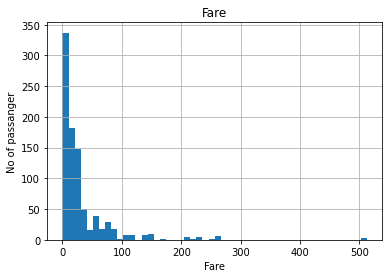

In [26]:
figure= df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passanger')


# Non-Gaussian Distribued

In [27]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
IQR =df.Fare.quantile(.75)- df.Fare.quantile(.25)
IQR


23.0896

In [30]:


lower_bridge= df['Fare'].quantile(.25)-(IQR * 1.5)

upper_bridge= df['Fare'].quantile(.75)+(IQR * 1.5)

print(lower_bridge, upper_bridge)

-26.724 65.6344


In [31]:
# Suppose you want's to calculate the Extreme boundary(mostly we use this)

# As data is extremely outlier we sill use it *3 means 100

# Don't use -61, as fare can't be negative

lower_bridge= df['Fare'].quantile(.25)-(IQR * 3)

upper_bridge= df['Fare'].quantile(.75)+(IQR * 3)

print(lower_bridge, upper_bridge)

-61.358399999999996 100.2688


In [45]:
data=df.copy()

In [ ]:
# Now using the outlier

# For Age column------ 73, -13

In [46]:
data.loc[data['Age']>=73, 'Age']=73

# upper outlier has been dealt

Text(0, 0.5, 'No of passanger')

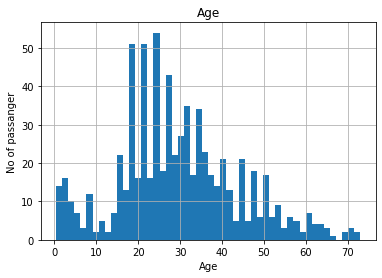

In [56]:
figure= data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passanger')

In [48]:
# Now applying for fare

data.loc[data['Fare']>=100, 'Fare']=100

Text(0, 0.5, 'No of passanger')

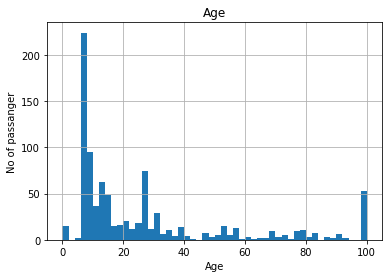

In [55]:
figure= data.Fare.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passanger')

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(data[['Age','Fare']].fillna(0), data['Survived'], test_size=0.3)

In [73]:
x_train.shape

(623, 2)

In [78]:
## Logistic regression

from sklearn.linear_model import LogisticRegression



classifier=LogisticRegression()
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)
y_pred1= classifier.predict_proba(x_test)



from sklearn.metrics import accuracy_score, roc_auc_score

print('Accuracy Score {}'.format(accuracy_score(y_test, y_pred)))
print('ROC_auc_score {}'.format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy Score 0.6604477611940298
ROC_auc_score 0.6902507603144545


In [79]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier



classifier=RandomForestClassifier()
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)
y_pred1= classifier.predict_proba(x_test)



from sklearn.metrics import accuracy_score, roc_auc_score

print('Accuracy Score {}'.format(accuracy_score(y_test, y_pred)))
print('ROC_auc_score {}'.format(roc_auc_score(y_test, y_pred1[:,1])))


Accuracy Score 0.6343283582089553
ROC_auc_score 0.6942101337005795
